### Importando dataframe

In [303]:
from pandas import read_csv, read_excel

from scipy.stats import chi2_contingency

from myFunctions import multiple_series_line_Chart

import seaborn as sns
import matplotlib.pyplot as plt



df = read_csv('../Data/CSV/csv_sifilis_moc_2019_2023.csv', sep=",", encoding='latin1', engine='python', thousands='.', decimal=',')

In [304]:
df.columns

Index(['Data_Notificacao', 'Ano', 'ID_MUNICIP', 'Unidade', 'DT_DIAG', 'Idade',
       'TriGestacional', 'Raca', 'Escolaridade', 'Residencia', 'TPCONFIRMA',
       'Tratamento', 'TPMOTPARC', 'TPESQPAR', 'TratamentoParceiro',
       'CLASSI_FIN'],
      dtype='object')

In [305]:

print('TPMOTPARC' in df.columns) 
print('TPESQPARC' in df.columns)
print('TRATPARC' in df.columns)


True
False
False


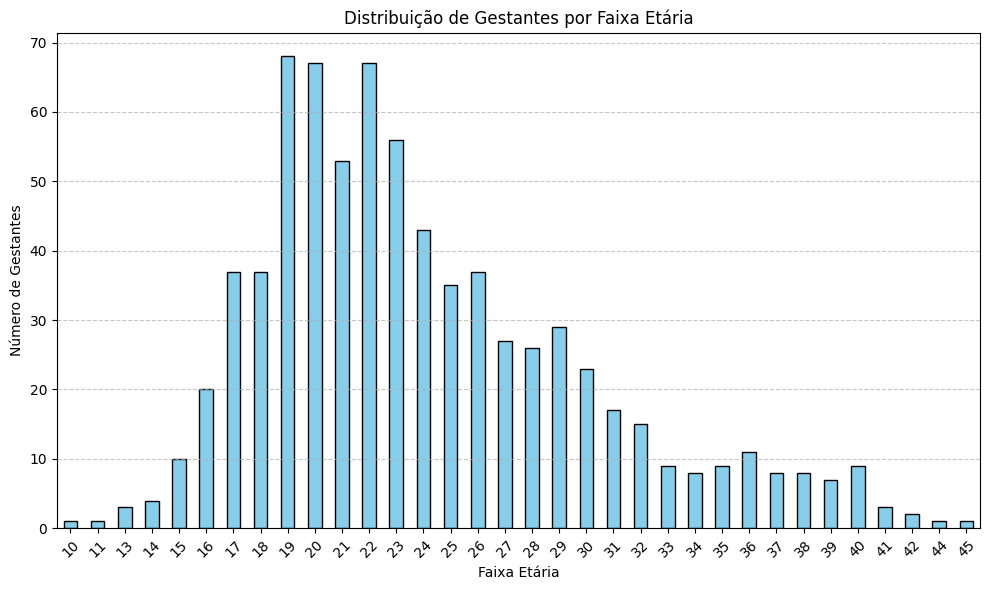

In [306]:
import matplotlib.pyplot as plt

# Contar gestantes por faixa etária
contagem = df['Idade'].value_counts().sort_index()

# Configurar o gráfico
plt.figure(figsize=(10, 6))
contagem.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar
plt.title('Distribuição de Gestantes por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Gestantes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir
plt.tight_layout()
plt.show()

### Analisando proporções

In [307]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def multiple_series_line_Chart(coluna, DataFrame):
    df = DataFrame.copy()

    # Agrupar por ano e coluna de interesse
    df_grouped = df.groupby(['Ano', coluna]).size().unstack(fill_value=0)

    # Plotar gráfico de linhas
    df_grouped.plot(kind='line', marker='o', figsize=(12, 6))

    plt.title(f'Evolução temporal da variável: {coluna}')
    plt.xlabel('Ano')
    plt.ylabel('Número de casos')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Eixo Y com mais graduação
    max_y = df_grouped.max().max()
    step_y = max(1, int(max_y // 10))
    plt.yticks(np.arange(0, max_y + step_y, step_y))

    # Eixo X com apenas anos inteiros
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.xticks([int(x) for x in df_grouped.index])

    plt.legend(title=coluna)
    plt.tight_layout()
    plt.show()


#### Zonas de residências das gestantes com sífilis 2019 à 2023


Residência por gestante:
Residencia
Urbana       96.143617
Em Branco     2.127660
Rural         1.329787
Ignorado      0.398936
Name: proportion, dtype: float64

Residência por gestante em 2019:
Residencia
Urbana       97.163121
Em Branco     2.127660
Rural         0.709220
Name: proportion, dtype: float64

Residência por gestante em 2020:
Residencia
Urbana       97.945205
Em Branco     1.369863
Ignorado      0.684932
Name: proportion, dtype: float64

Residência por gestante em 2021:
Residencia
Urbana       92.528736
Em Branco     4.022989
Rural         2.298851
Ignorado      1.149425
Name: proportion, dtype: float64

Residência por gestante em 2022:
Residencia
Urbana       97.080292
Rural         1.459854
Em Branco     1.459854
Name: proportion, dtype: float64

Residência por gestante em 2023:
Residencia
Urbana       96.753247
Rural         1.948052
Em Branco     1.298701
Name: proportion, dtype: float64


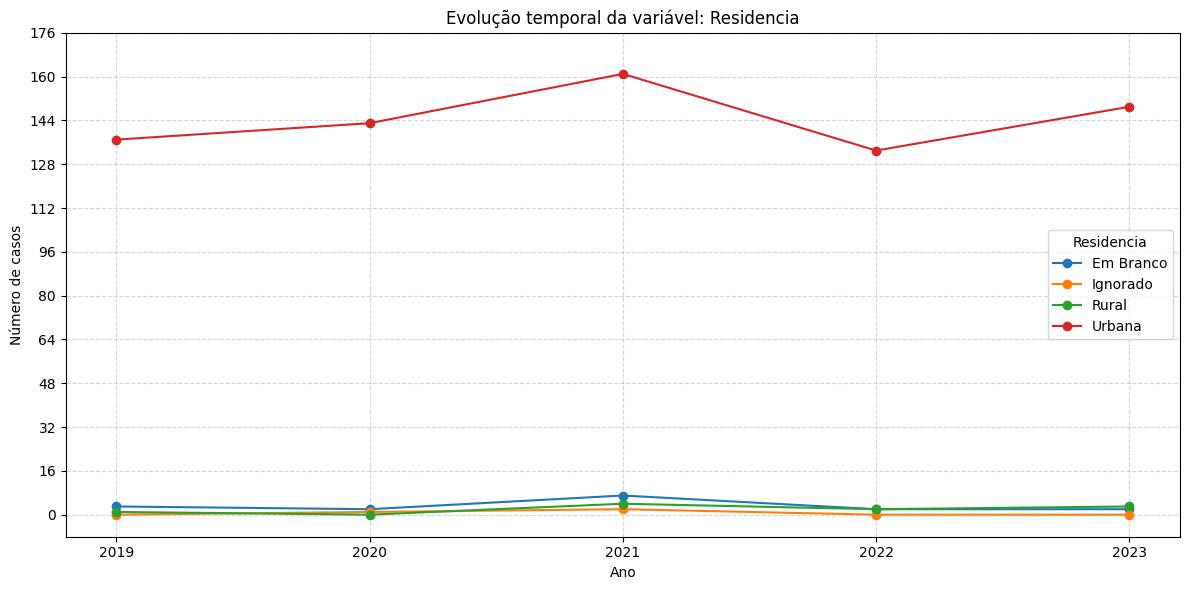

In [308]:

#Zona de residência: Frequência por zona (rural, urbana, etc.).
print("\nResidência por gestante:")
print(df['Residencia'].value_counts(normalize=True) * 100)
# Proporções para o ano de 2019
print("\nResidência por gestante em 2019:")
print(df[df['Ano'] == 2019]['Residencia'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2020
print("\nResidência por gestante em 2020:")
print(df[df['Ano'] == 2020]['Residencia'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2021
print("\nResidência por gestante em 2021:")
print(df[df['Ano'] == 2021]['Residencia'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2022
print("\nResidência por gestante em 2022:")
print(df[df['Ano'] == 2022]['Residencia'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2023
print("\nResidência por gestante em 2023:")
print(df[df['Ano'] == 2023]['Residencia'].value_counts(normalize=True) * 100)

multiple_series_line_Chart('Residencia', DataFrame = df)




#### Zonas de residências das gestantes com sífilis 2019 à 2023


Raca por gestante:
Raca
Parda                      62.101064
Não Assinalado na Ficha    20.877660
Branca                      7.978723
Preta                       6.648936
Em Branco                   1.728723
Amarela                     0.531915
Indígena                    0.132979
Name: proportion, dtype: float64

Raca por gestante em 2019:
Raca
Parda                      78.723404
Preta                       7.092199
Branca                      6.382979
Não Assinalado na Ficha     5.673759
Indígena                    0.709220
Em Branco                   0.709220
Amarela                     0.709220
Name: proportion, dtype: float64

Raça por gestante em 2020:
Raca
Parda                      59.589041
Não Assinalado na Ficha    26.027397
Preta                       4.794521
Em Branco                   4.794521
Branca                      4.794521
Name: proportion, dtype: float64

Raça por gestante em 2021:
Raca
Parda                      62.643678
Não Assinalado na Ficha    18.965517


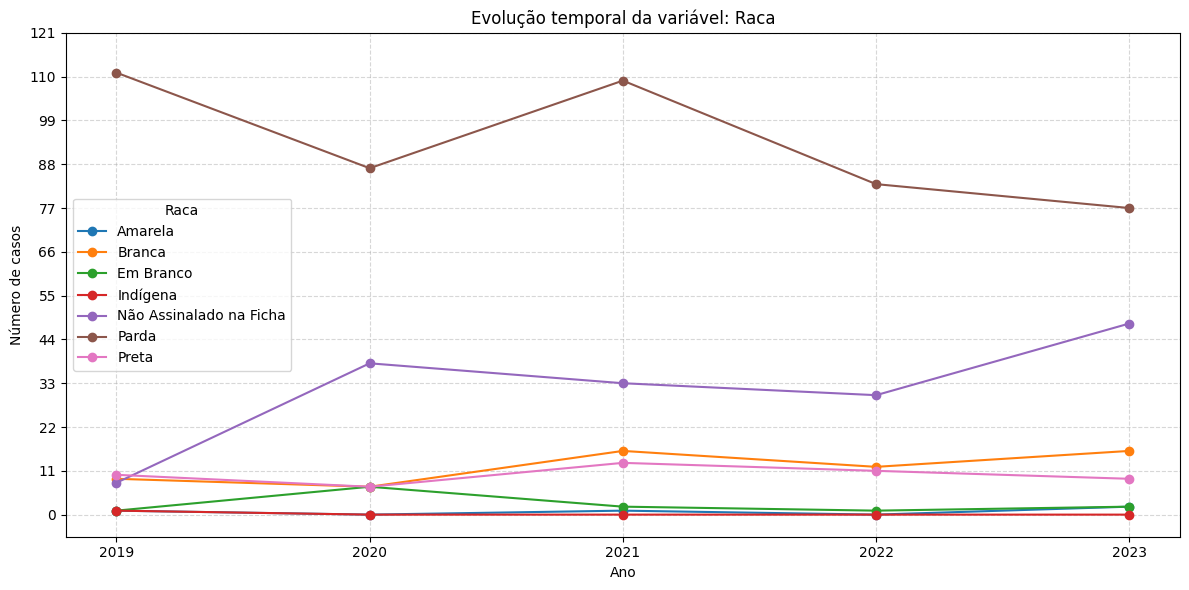

In [309]:
#Raca da gestante: Proporção por categorias.
print("\nRaca por gestante:")
print(df['Raca'].value_counts(normalize=True) * 100)
# Proporções para o ano de 2019
print("\nRaca por gestante em 2019:")
print(df[df['Ano'] == 2019]['Raca'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2020
print("\nRaça por gestante em 2020:")
print(df[df['Ano'] == 2020]['Raca'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2021
print("\nRaça por gestante em 2021:")
print(df[df['Ano'] == 2021]['Raca'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2022
print("\nRaça por gestante em 2022:")
print(df[df['Ano'] == 2022]['Raca'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2023
print("\nRaça por gestante em 2023:")
print(df[df['Ano'] == 2023]['Raca'].value_counts(normalize=True) * 100)
#Faça isso apenas para ano de 2019
# print(df['Raca'].value_counts(normalize=True) * 100 * df['Ano'].value_counts(normalize=True)[2019])


multiple_series_line_Chart('Raca', df)

#### Trimestre gestacional de notificação da gestante em Montes Claros 2019 2023


Trimestre gestacional por gestante:
TriGestacional
3º                            42.686170
1º                            23.138298
Idade Gestacional Ignorada    18.484043
2º                            15.691489
Name: proportion, dtype: float64

Trimestre gestacional por gestante em 2019:
TriGestacional
3º                            40.425532
2º                            20.567376
Idade Gestacional Ignorada    20.567376
1º                            18.439716
Name: proportion, dtype: float64

Trimestre gestacional por gestante em 2020:
TriGestacional
3º                            39.726027
1º                            23.972603
Idade Gestacional Ignorada    20.547945
2º                            15.753425
Name: proportion, dtype: float64

Trimestre gestacional por gestante em 2021:
TriGestacional
3º                            55.747126
1º                            18.965517
2º                            14.942529
Idade Gestacional Ignorada    10.344828
Name: proportion, dtype: floa

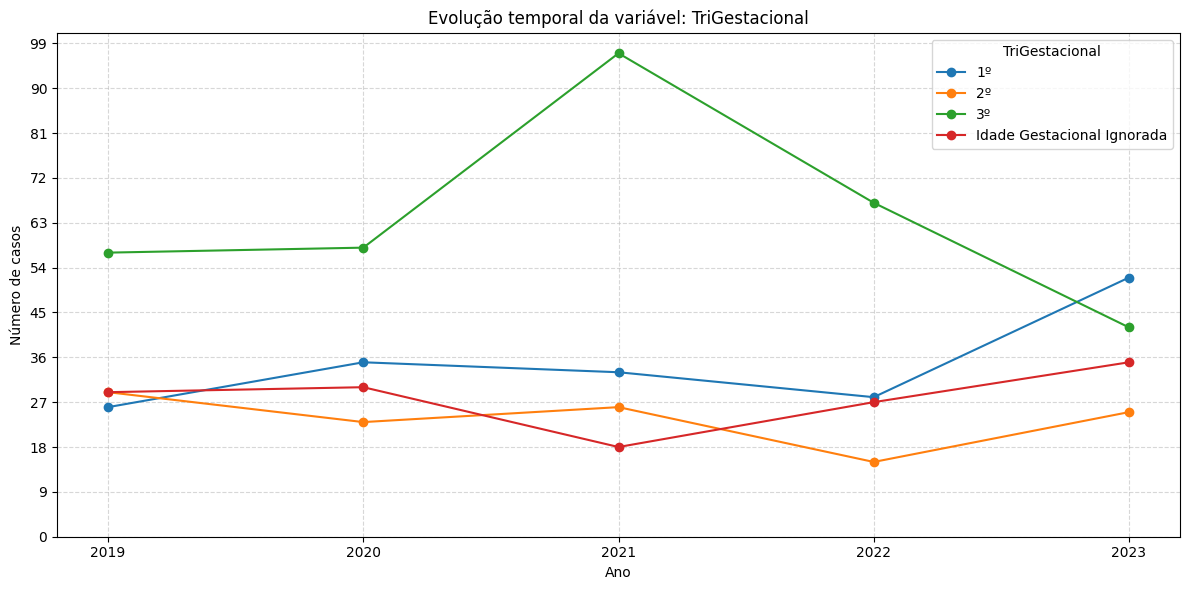

In [310]:
print("\nTrimestre gestacional por gestante:")
print(df['TriGestacional'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2019
print("\nTrimestre gestacional por gestante em 2019:")
print(df[df['Ano'] == 2019]['TriGestacional'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2020
print("\nTrimestre gestacional por gestante em 2020:")
print(df[df['Ano'] == 2020]['TriGestacional'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2021
print("\nTrimestre gestacional por gestante em 2021:")
print(df[df['Ano'] == 2021]['TriGestacional'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2022
print("\nTrimestre Gestacional de Diagnóstico por gestante em 2022:")
print(df[df['Ano'] == 2022]['TriGestacional'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2023
print("\nTrimestre gestacional por gestante em 2023:")
print(df[df['Ano'] == 2023]['TriGestacional'].value_counts(normalize=True) * 100)


multiple_series_line_Chart('TriGestacional', df)

#### Grau de escolaridade das gestantes notificadas com sífilis em Montes Claros 2019 à 2023


Escolaridade por gestante:
Escolaridade
Ignorado                          57.390146
Médio completo                    15.845539
Em Branco                          9.454061
Médio incompleto                   7.057257
5ª à 8ª série incompleta do EF     3.595206
Fundamental completo               2.663116
Superior incompleta                1.331558
4ª série completa do EF            0.932091
Educação superior completa         0.932091
1ª a 4ª série incompleta do EF     0.798935
Name: proportion, dtype: float64

Escolaridade por gestante em 2019:
Escolaridade
Médio completo                    39.007092
Ignorado                          23.404255
Médio incompleto                  14.184397
5ª à 8ª série incompleta do EF     7.092199
Superior incompleta                4.964539
Em Branco                          4.964539
Fundamental completo               2.127660
4ª série completa do EF            2.127660
Educação superior completa         2.127660
Name: proportion, dtype: float64

Escolar

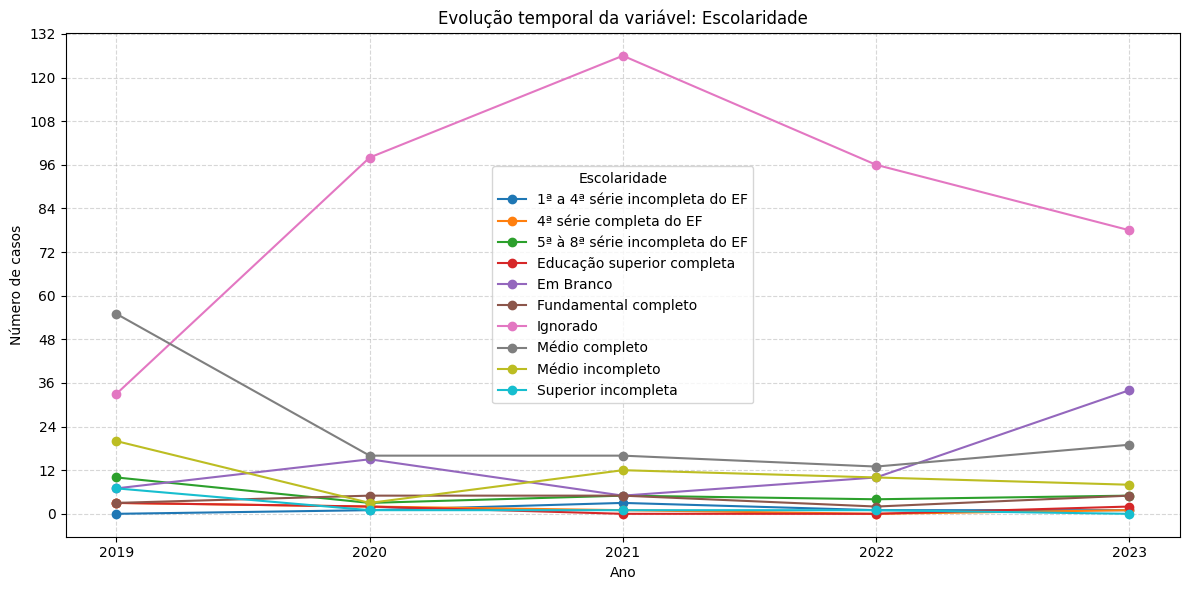

In [311]:
# Grau de escolaridade das gestantes: Proporção por categorias.
print("\nEscolaridade por gestante:")
print(df['Escolaridade'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2019
print("\nEscolaridade por gestante em 2019:")
print(df[df['Ano'] == 2019]['Escolaridade'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2020
print("\nEscolaridade por gestante em 2020:")
print(df[df['Ano'] == 2020]['Escolaridade'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2021
print("\nEscolaridade por gestante em 2021:")
print(df[df['Ano'] == 2021]['Escolaridade'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2022
print("\nEscolaridade por gestante em 2022:")
print(df[df['Ano'] == 2022]['Escolaridade'].value_counts(normalize=True) * 100)

# Proporções para o ano de 2023
print("\nEscolaridade por gestante em 2023:")
print(df[df['Ano'] == 2023]['Escolaridade'].value_counts(normalize=True) * 100)


multiple_series_line_Chart('Escolaridade', df)




#### Conclusão:

#### ATENÇÃO, ao utilizar estas estatísticas de proporção saíba que a amostra foi reduzida afinal boa parte das fichas foram preenchidas de forma errônea ou inconsistente. Portanto, os dados inconsistentes foram ignorados de modo que para qualquer porcentNU_IDADE_Nm lida abaixo deve-se considerar o padrão:
### "Pelo menos x% das gestantes foram ..."
### ou 
### " uma representação do todo de pelo menos x% das notificações denotam ..."


Observou-se que:

1 - A proporção das gestantes notificadas com sífilis entre 2019 e 2023 se fez predominante em residentes de área urbana, de modo que em 2021 foi notificado um recorde de pelo menos 2%, ou seja 4 das 167 gestantes notificadas com sífilis naquele ano eram residentes de zona rural.


1-Branca 2-Preta 3-Amarela
4-Parda 5-Indígena 9- Ignorad

2 - A proporção das gestantes notificadas com sífilis entre 2019 e 2023 se fez predominante em gestantes de raça parda, de modo que em 2019 78.74% das gestantes se identificavam como pardas e essa proporção foi diminuindo de modo que em 2023 fosse de 48.54%. Além de tudo o número de gestantes que assinalaram a seção de ignorado na ficha de investigação cresceu de 5.51% em 2019 para 34.95% em 2023.
    Enquanto isso a menor proporção de gestantes que se identificam como brancas respondeu à ficha em 2020 representando 4.91% da amostra.
    Enquanto isso a maior proporção de gestantes que se identificam como brancas respondeu à ficha em 2023 representando pelo menos 9.7% da amostra.
    Enquanto isso a menor proporção de gestantes que se identificam como pretas respondeu à ficha em 2020 representando 3.27% da amostra.
    Enquanto isso a maior proporção de gestantes que se identificam como pretas respondeu à ficha em 2022 representando 8.4% da amostra.

    E gestantes que se identificavam como indígenas OU amarelas durante os 5 anos representavam sempre menos de 1% da amostra.
    E gestantes que se identificavam como indígenas E as que se identificavam como amarelas durante os 5 anos somatizavam sempre menos de 1% da amostra.
    

3 - A proporção das gestantes notificadas com sífilis entre 2019 e 2023 se fez predominantemente quando as mesmas se encontravam no 3 trimestre gestacional até o ano de 2022. O número de gestantes notificadas no 1º Trimestre gestacional maior que as notificadas em outros períodos gestacionais.

Ademais poe-se perceber uma difícil notificação de gestantes no 2 trimestre gestacional, uma vez que esse número se representa menos de 20% de todas as notificações em todos os anos.

Outra importante observação é que o menor número de notificações de gestantes notificadas no 4 período gestacional ocorreu em 2021 representando aproximadamente 10% de todas as notificações do ano de 2021

É interessante observar que desde 2019 até 2023 o número de gestantes notificadas no 3º trimestre gestacional cairam de uma representação do todo de 40.42% para 27.27 % . Enquanto isso as notificadas no 1º trimestre gestacional aumentaram de uma representação do todo de 18.43 % para 33.76%

Por fim observa-se que o pico em relação à outras notificações ocorreu em 2021, quando as notificações em relação ao todo de gestantes no 3º trimestre gestacional atingiram 55.54%.


4ª Das gestantes notificadas com sífilis entre 2019 e 2023 houve uma prevalência acima de 70% que marcaram ignorado na seção escolaridade à partir de 2020. O ano onde menos houveram marcações nessa alternativa foi em 2019 com uma representação de 63.28% do todo.

### Análise de frequências

Tabela de Frequência com PorcentIdadem:
    Idade  Frequency  PercentIdade
0      10          1      0.132979
1      11          1      0.132979
2      13          3      0.398936
3      14          4      0.531915
4      15         10      1.329787
5      16         20      2.659574
6      17         37      4.920213
7      18         37      4.920213
8      19         68      9.042553
9      20         67      8.909574
10     21         53      7.047872
11     22         67      8.909574
12     23         56      7.446809
13     24         43      5.718085
14     25         35      4.654255
15     26         37      4.920213
16     27         27      3.590426
17     28         26      3.457447
18     29         29      3.856383
19     30         23      3.058511
20     31         17      2.260638
21     32         15      1.994681
22     33          9      1.196809
23     34          8      1.063830
24     35          9      1.196809
25     36         11      1.462766
26     37      

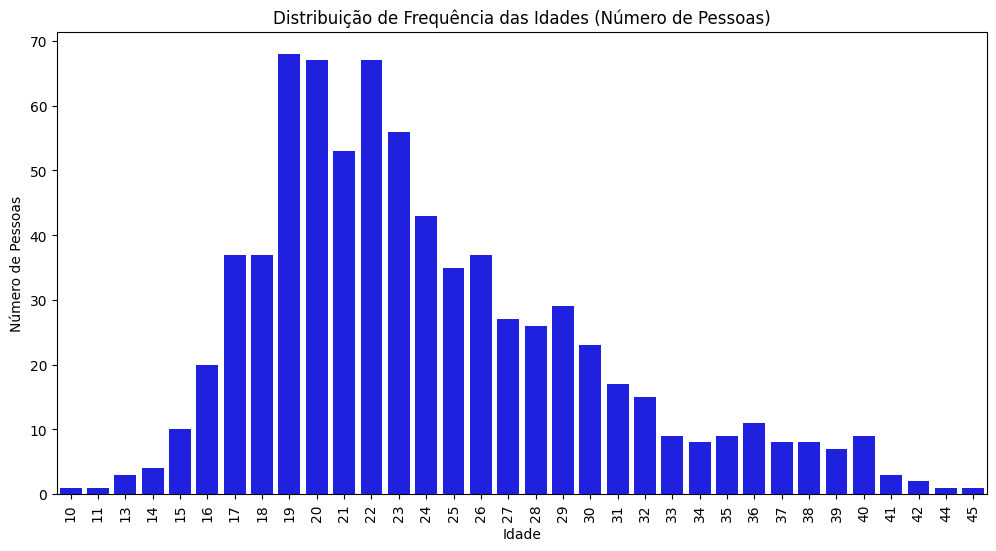

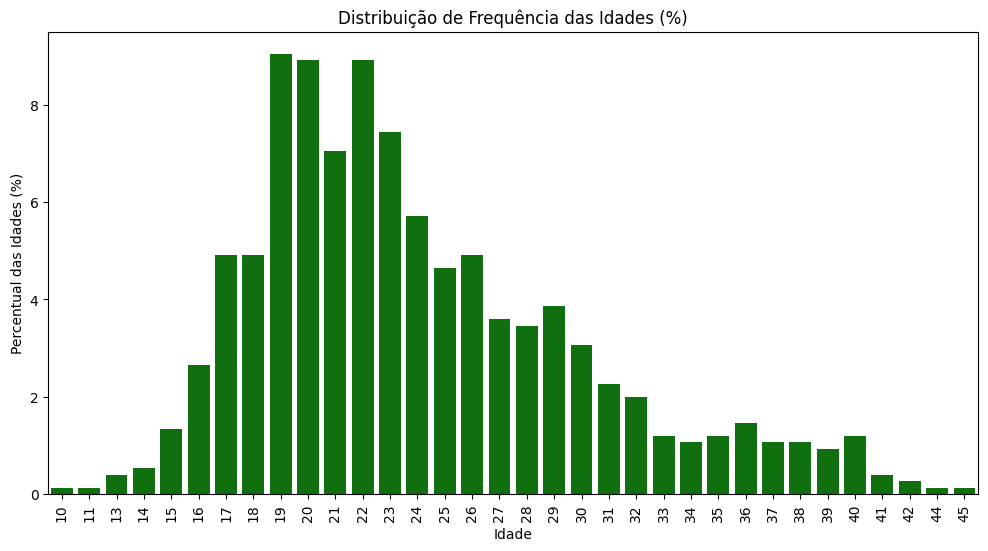

In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df é o DataFrame com as idades já processadas
# Exemplo de criação de df (caso ainda não tenha sido feito):
# Idades = df['Idade'].astype(str).apply(lambda x: [x[i:i+2] for i in range(0, len(x), 2)]).explode()
# Idades = Idades.astype(int)
# df = pd.DataFrame(Idades, columns=['Idade'])

# Criar a tabela de frequência absoluta
freq_table = df['Idade'].value_counts().sort_index().reset_index()
freq_table.columns = ['Idade', 'Frequency']

# Calcular a frequência relativa (porcentIdadem)
total_pessoas = freq_table['Frequency'].sum()
freq_table['PercentIdade'] = (freq_table['Frequency'] / total_pessoas) * 100

# Exibir a tabela de frequência com porcentIdadem
print("Tabela de Frequência com PorcentIdadem:")
print(freq_table)

# Gerar o gráfico de barras para as frequências absolutas
plt.figure(figsize=(12, 6))
sns.barplot(x='Idade', y='Frequency', data=freq_table, color='blue')
plt.title('Distribuição de Frequência das Idades (Número de Pessoas)')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=90)
plt.show()

# Gerar o gráfico de barras para as frequências relativas (porcentIdadem)
plt.figure(figsize=(12, 6))
sns.barplot(x='Idade', y='PercentIdade', data=freq_table, color='green')
plt.title('Distribuição de Frequência das Idades (%)')
plt.xlabel('Idade')
plt.ylabel('Percentual das Idades (%)')
plt.xticks(rotation=90)
plt.show()

In [313]:
import pandas as pd

# Supondo que df é o DataFrame com as idades já processadas
# Exemplo de criação de df (caso ainda não tenha sido feito):
# ages = df['Idade'].astype(str).apply(lambda x: [x[i:i+2] for i in range(0, len(x), 2)]).explode()
# ages = ages.astype(int)
# df = pd.DataFrame(ages, columns=['Age'])

# Criar a tabela de frequência absoluta e relativa
freq_table = df['Idade'].value_counts().sort_index().reset_index()
freq_table.columns = ['Idade', 'Frequency']
total_pessoas = freq_table['Frequency'].sum()
freq_table['Percentage'] = (freq_table['Frequency'] / total_pessoas) * 100

# Formatando a coluna de porcentagem para exibir 2 casas decimais
freq_table['Percentage'] = freq_table['Percentage'].round(2)

# Gerar a tabela em LaTeX
latex_table = freq_table.to_latex(index=False, 
                                 caption="Tabela de Frequência de Idades", 
                                 label="tab:frequencia_idades",
                                 column_format="|c|c|c|",
                                 header=["Idade", "Frequência", "Porcentagem (%)"])

# Exibir o código LaTeX gerado
print(latex_table)

\begin{table}
\caption{Tabela de Frequência de Idades}
\label{tab:frequencia_idades}
\begin{tabular}{|c|c|c|}
\toprule
Idade & Frequência & Porcentagem (%) \\
\midrule
10 & 1 & 0.130000 \\
11 & 1 & 0.130000 \\
13 & 3 & 0.400000 \\
14 & 4 & 0.530000 \\
15 & 10 & 1.330000 \\
16 & 20 & 2.660000 \\
17 & 37 & 4.920000 \\
18 & 37 & 4.920000 \\
19 & 68 & 9.040000 \\
20 & 67 & 8.910000 \\
21 & 53 & 7.050000 \\
22 & 67 & 8.910000 \\
23 & 56 & 7.450000 \\
24 & 43 & 5.720000 \\
25 & 35 & 4.650000 \\
26 & 37 & 4.920000 \\
27 & 27 & 3.590000 \\
28 & 26 & 3.460000 \\
29 & 29 & 3.860000 \\
30 & 23 & 3.060000 \\
31 & 17 & 2.260000 \\
32 & 15 & 1.990000 \\
33 & 9 & 1.200000 \\
34 & 8 & 1.060000 \\
35 & 9 & 1.200000 \\
36 & 11 & 1.460000 \\
37 & 8 & 1.060000 \\
38 & 8 & 1.060000 \\
39 & 7 & 0.930000 \\
40 & 9 & 1.200000 \\
41 & 3 & 0.400000 \\
42 & 2 & 0.270000 \\
44 & 1 & 0.130000 \\
45 & 1 & 0.130000 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\joaog\AppData\Local\Temp\ipykernel_9668\374832971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=notificacoes_por_ano, x='Ano', y='Total_Notificacoes', palette='Reds')


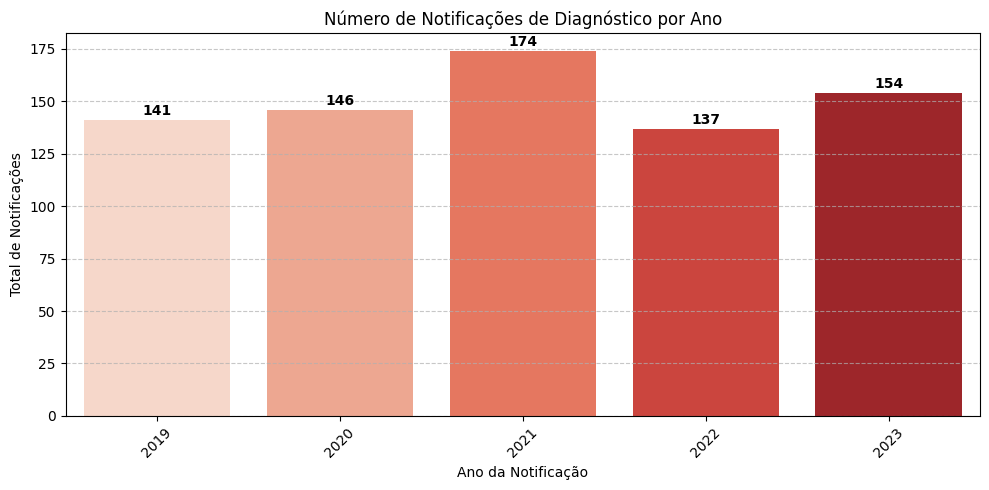

In [314]:
# Agrupando os dados por ano e contando o número de notificações
notificacoes_por_ano = df.groupby('Ano').size().reset_index(name='Total_Notificacoes')

# Criando o gráfico de barras
plt.figure(figsize=(10,5))
ax = sns.barplot(data=notificacoes_por_ano, x='Ano', y='Total_Notificacoes', palette='Reds')

# Adicionando os valores acima das barras
for index, row in notificacoes_por_ano.iterrows():
    plt.text(x=index, 
             y=row['Total_Notificacoes'] + 1, 
             s=str(row['Total_Notificacoes']), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Personalizando o gráfico
plt.xlabel('Ano da Notificação')
plt.ylabel('Total de Notificações')
plt.title('Número de Notificações de Diagnóstico por Ano')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


C:\Users\joaog\AppData\Local\Temp\ipykernel_9668\231034990.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=notificacoes_por_ano, x='Ano', y='Percentual', palette='Blues')


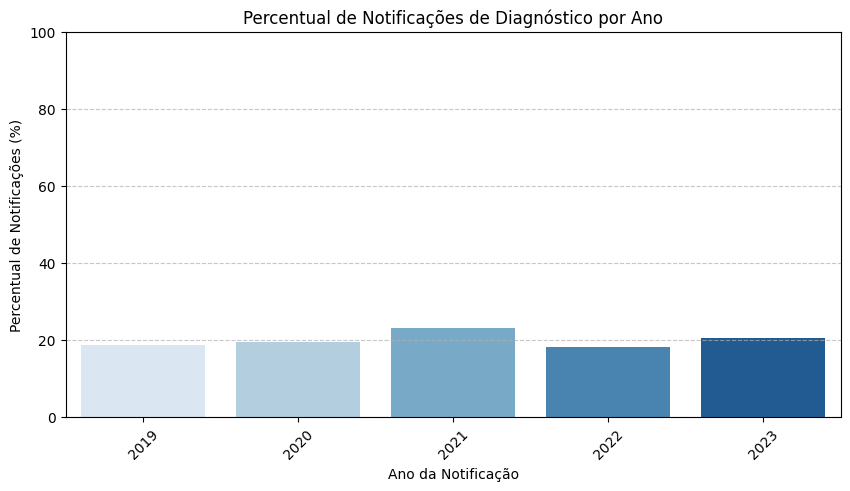

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contando o número de notificações por ano
notificacoes_por_ano = df['Ano'].value_counts(normalize=True).reset_index()
notificacoes_por_ano.columns = ['Ano', 'Percentual']
notificacoes_por_ano = notificacoes_por_ano.sort_values(by='Ano')

# Convertendo percentual para escala de 0 a 100
notificacoes_por_ano['Percentual'] *= 100  

# Criando o gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(data=notificacoes_por_ano, x='Ano', y='Percentual', palette='Blues')

# Personalizando o gráfico
plt.xlabel('Ano da Notificação')
plt.ylabel('Percentual de Notificações (%)')
plt.title('Percentual de Notificações de Diagnóstico por Ano')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Exibindo os valores no topo das barras
# for index, row in notificacoes_por_ano.iterrows():
#     plt.text(row['Ano'], row['Percentual'] + 1, f"{row['Percentual']:.1f}%", ha='center', fontsize=10)

# Exibindo o gráfico
plt.show()



Residência por gestante:
Residencia
Urbana       723
Em Branco     16
Rural         10
Ignorado       3
Name: count, dtype: int64

Residência por gestante em 2019:
Residencia
Urbana       137
Em Branco      3
Rural          1
Name: count, dtype: int64

Residência por gestante em 2020:
Residencia
Urbana       143
Em Branco      2
Ignorado       1
Name: count, dtype: int64

Residência por gestante em 2021:
Residencia
Urbana       161
Em Branco      7
Rural          4
Ignorado       2
Name: count, dtype: int64

Residência por gestante em 2022:
Residencia
Urbana       133
Rural          2
Em Branco      2
Name: count, dtype: int64

Residência por gestante em 2023:
Residencia
Urbana       149
Rural          3
Em Branco      2
Name: count, dtype: int64


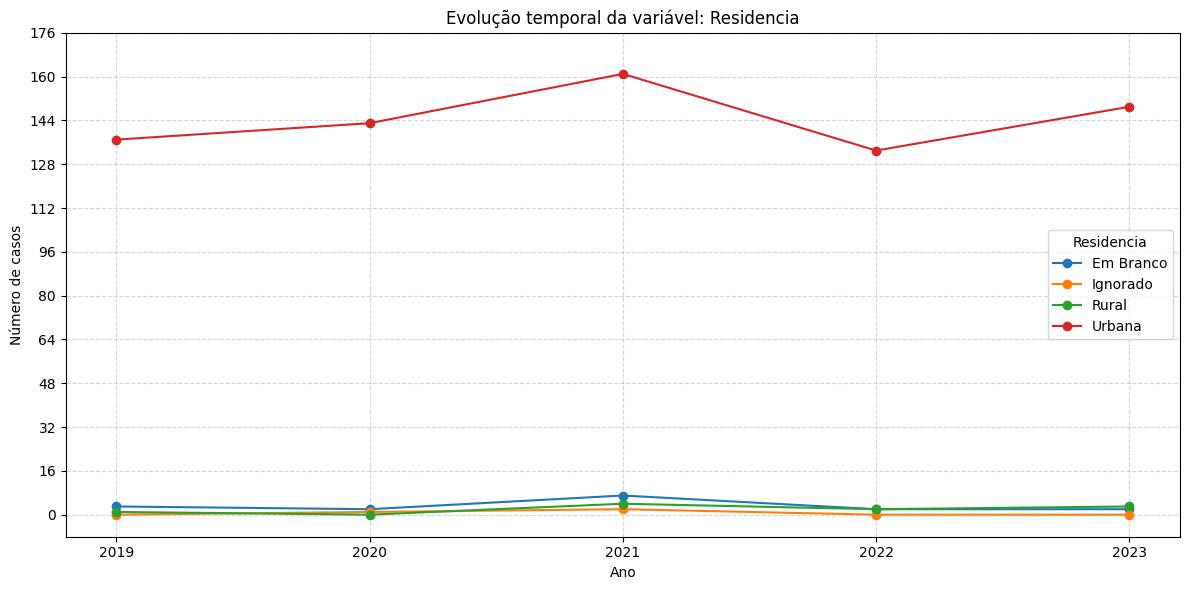

In [316]:
print("\nResidência por gestante:")
print(df['Residencia'].value_counts())

print("\nResidência por gestante em 2019:")
print(df[df['Ano'] == 2019]['Residencia'].value_counts())

print("\nResidência por gestante em 2020:")
print(df[df['Ano'] == 2020]['Residencia'].value_counts())

print("\nResidência por gestante em 2021:")
print(df[df['Ano'] == 2021]['Residencia'].value_counts())

print("\nResidência por gestante em 2022:")
print(df[df['Ano'] == 2022]['Residencia'].value_counts())

print("\nResidência por gestante em 2023:")
print(df[df['Ano'] == 2023]['Residencia'].value_counts())

multiple_series_line_Chart('Residencia', DataFrame=df)



Raça por gestante:
Raca
Parda                      467
Não Assinalado na Ficha    157
Branca                      60
Preta                       50
Em Branco                   13
Amarela                      4
Indígena                     1
Name: count, dtype: int64

Raça por gestante em 2019:
Raca
Parda                      111
Preta                       10
Branca                       9
Não Assinalado na Ficha      8
Indígena                     1
Em Branco                    1
Amarela                      1
Name: count, dtype: int64

Raça por gestante em 2020:
Raca
Parda                      87
Não Assinalado na Ficha    38
Preta                       7
Em Branco                   7
Branca                      7
Name: count, dtype: int64

Raça por gestante em 2021:
Raca
Parda                      109
Não Assinalado na Ficha     33
Branca                      16
Preta                       13
Em Branco                    2
Amarela                      1
Name: count, dtype: int64

R

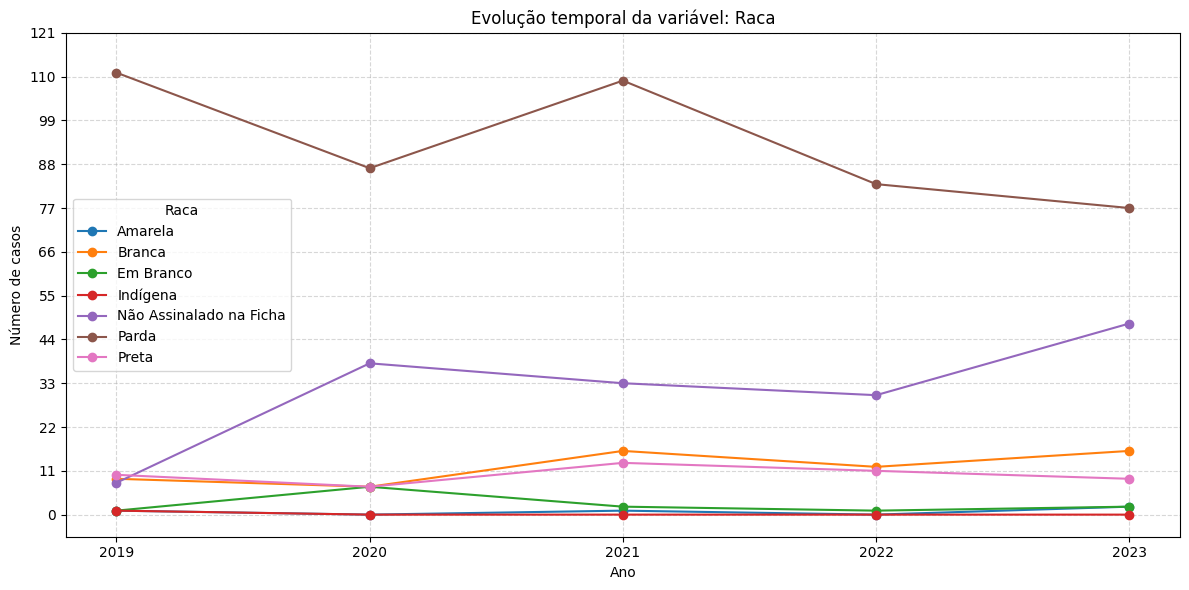

In [317]:
print("\nRaça por gestante:")
print(df['Raca'].value_counts())

print("\nRaça por gestante em 2019:")
print(df[df['Ano'] == 2019]['Raca'].value_counts())

print("\nRaça por gestante em 2020:")
print(df[df['Ano'] == 2020]['Raca'].value_counts())

print("\nRaça por gestante em 2021:")
print(df[df['Ano'] == 2021]['Raca'].value_counts())

print("\nRaça por gestante em 2022:")
print(df[df['Ano'] == 2022]['Raca'].value_counts())

print("\nRaça por gestante em 2023:")
print(df[df['Ano'] == 2023]['Raca'].value_counts())


multiple_series_line_Chart('Raca', df)



Trimestre gestacional por gestante:
TriGestacional
3º                            321
1º                            174
Idade Gestacional Ignorada    139
2º                            118
Name: count, dtype: int64

Trimestre gestacional por gestante em 2019:
TriGestacional
3º                            57
2º                            29
Idade Gestacional Ignorada    29
1º                            26
Name: count, dtype: int64

Trimestre gestacional por gestante em 2020:
TriGestacional
3º                            58
1º                            35
Idade Gestacional Ignorada    30
2º                            23
Name: count, dtype: int64

Trimestre gestacional por gestante em 2021:
TriGestacional
3º                            97
1º                            33
2º                            26
Idade Gestacional Ignorada    18
Name: count, dtype: int64

Trimestre gestacional por gestante em 2022:
TriGestacional
3º                            67
1º                            28
Idade 

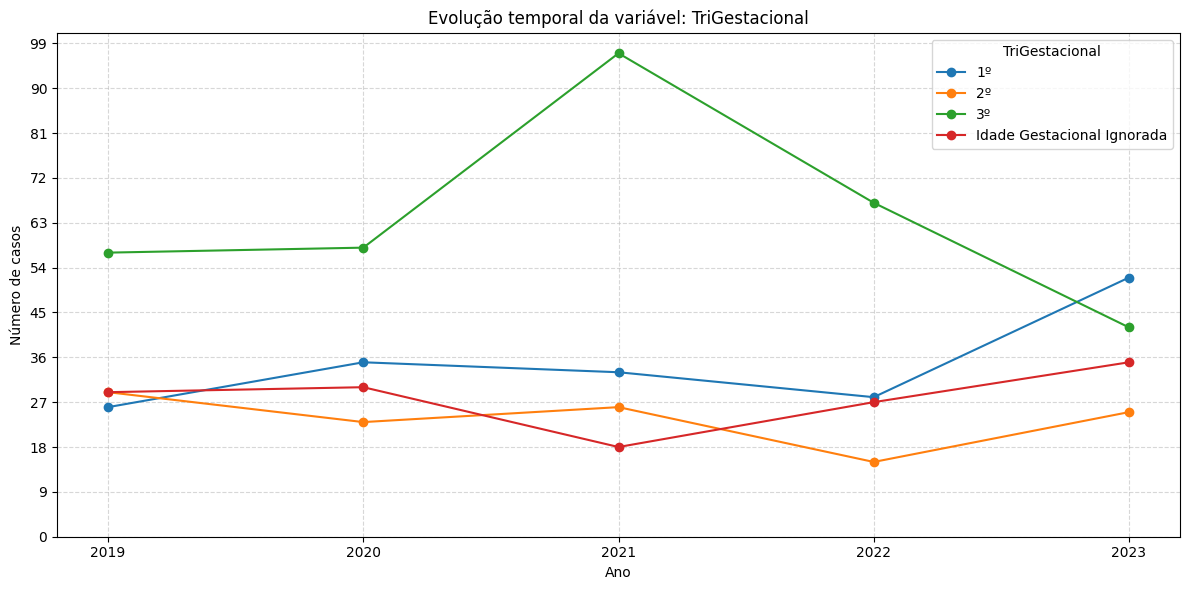

In [318]:
print("\nTrimestre gestacional por gestante:")
print(df['TriGestacional'].value_counts())

print("\nTrimestre gestacional por gestante em 2019:")
print(df[df['Ano'] == 2019]['TriGestacional'].value_counts())

print("\nTrimestre gestacional por gestante em 2020:")
print(df[df['Ano'] == 2020]['TriGestacional'].value_counts())

print("\nTrimestre gestacional por gestante em 2021:")
print(df[df['Ano'] == 2021]['TriGestacional'].value_counts())

print("\nTrimestre gestacional por gestante em 2022:")
print(df[df['Ano'] == 2022]['TriGestacional'].value_counts())

print("\nTrimestre gestacional por gestante em 2023:")
print(df[df['Ano'] == 2023]['TriGestacional'].value_counts())

multiple_series_line_Chart('TriGestacional', df)



Escolaridade por gestante:
Escolaridade
Ignorado                          431
Médio completo                    119
Em Branco                          71
Médio incompleto                   53
5ª à 8ª série incompleta do EF     27
Fundamental completo               20
Superior incompleta                10
4ª série completa do EF             7
Educação superior completa          7
1ª a 4ª série incompleta do EF      6
Name: count, dtype: int64

Escolaridade por gestante em 2019:
Escolaridade
Médio completo                    55
Ignorado                          33
Médio incompleto                  20
5ª à 8ª série incompleta do EF    10
Superior incompleta                7
Em Branco                          7
Fundamental completo               3
4ª série completa do EF            3
Educação superior completa         3
Name: count, dtype: int64

Escolaridade por gestante em 2020:
Escolaridade
Ignorado                          98
Médio completo                    16
Em Branco             

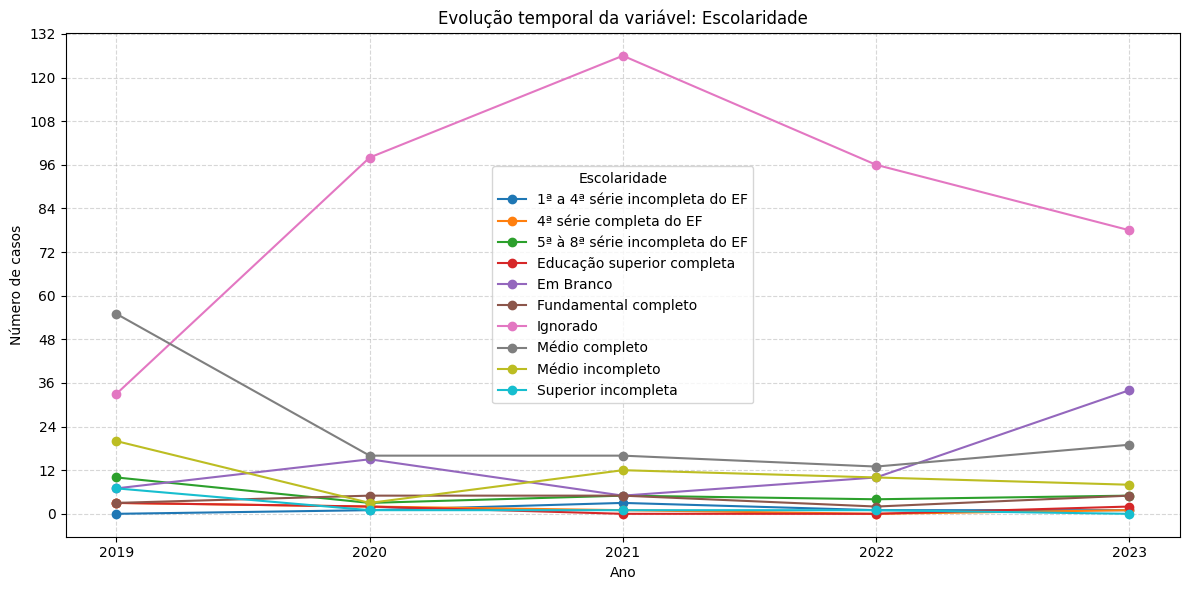

In [319]:
print("\nEscolaridade por gestante:")
print(df['Escolaridade'].value_counts())

print("\nEscolaridade por gestante em 2019:")
print(df[df['Ano'] == 2019]['Escolaridade'].value_counts())

print("\nEscolaridade por gestante em 2020:")
print(df[df['Ano'] == 2020]['Escolaridade'].value_counts())

print("\nEscolaridade por gestante em 2021:")
print(df[df['Ano'] == 2021]['Escolaridade'].value_counts())

print("\nEscolaridade por gestante em 2022:")
print(df[df['Ano'] == 2022]['Escolaridade'].value_counts())

print("\nEscolaridade por gestante em 2023:")
print(df[df['Ano'] == 2023]['Escolaridade'].value_counts())

multiple_series_line_Chart('Escolaridade', df)


In [320]:
def gerar_tabela_qualitativa_por_ano(df, coluna, col_ano='Ano'):
    anos = sorted(df[col_ano].dropna().unique())
    tabelas_latex = {}

    for ano in anos:
        dados_ano = df[df[col_ano] == ano][coluna].value_counts().reset_index()
        dados_ano.columns = [coluna, 'Frequência']
        total = dados_ano['Frequência'].sum()
        dados_ano['%'] = (dados_ano['Frequência'] / total * 100).round(2)

        latex_table = dados_ano.to_latex(index=False, caption=f'Estatística descritiva de {coluna} - Ano {ano}',
                                         label=f'tab:{coluna.lower()}_{ano}', column_format='lrr')
        tabelas_latex[ano] = latex_table

    return tabelas_latex


In [321]:

tabela = gerar_tabela_qualitativa_por_ano(df, 'Escolaridade', col_ano='Ano')

tabela

{np.int64(2019): '\\begin{table}\n\\caption{Estatística descritiva de Escolaridade - Ano 2019}\n\\label{tab:escolaridade_2019}\n\\begin{tabular}{lrr}\n\\toprule\nEscolaridade & Frequência & % \\\\\n\\midrule\nMédio completo  & 55 & 39.010000 \\\\\nIgnorado & 33 & 23.400000 \\\\\nMédio incompleto  & 20 & 14.180000 \\\\\n5ª à 8ª série incompleta do EF & 10 & 7.090000 \\\\\nSuperior incompleta & 7 & 4.960000 \\\\\nEm Branco & 7 & 4.960000 \\\\\nFundamental completo & 3 & 2.130000 \\\\\n4ª série completa do EF & 3 & 2.130000 \\\\\nEducação superior completa & 3 & 2.130000 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n',
 np.int64(2020): '\\begin{table}\n\\caption{Estatística descritiva de Escolaridade - Ano 2020}\n\\label{tab:escolaridade_2020}\n\\begin{tabular}{lrr}\n\\toprule\nEscolaridade & Frequência & % \\\\\n\\midrule\nIgnorado & 98 & 67.120000 \\\\\nMédio completo  & 16 & 10.960000 \\\\\nEm Branco & 15 & 10.270000 \\\\\nFundamental completo & 5 & 3.420000 \\\\\n5ª à 8ª série inc

In [322]:
df.columns

Index(['Data_Notificacao', 'Ano', 'ID_MUNICIP', 'Unidade', 'DT_DIAG', 'Idade',
       'TriGestacional', 'Raca', 'Escolaridade', 'Residencia', 'TPCONFIRMA',
       'Tratamento', 'TPMOTPARC', 'TPESQPAR', 'TratamentoParceiro',
       'CLASSI_FIN'],
      dtype='object')


📊 Frequência da coluna: TPMOTPARC
   TPMOTPARC  Frequência  Percentual (%)
0  Em Branco         496           65.96
1         60         113           15.03
2         10          58            7.71
3         30          35            4.65
4         20          20            2.66
5         50          20            2.66
6         40          10            1.33


C:\Users\joaog\AppData\Local\Temp\ipykernel_9668\300361933.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coluna, y='Frequência', data=freq_table, palette='crest')


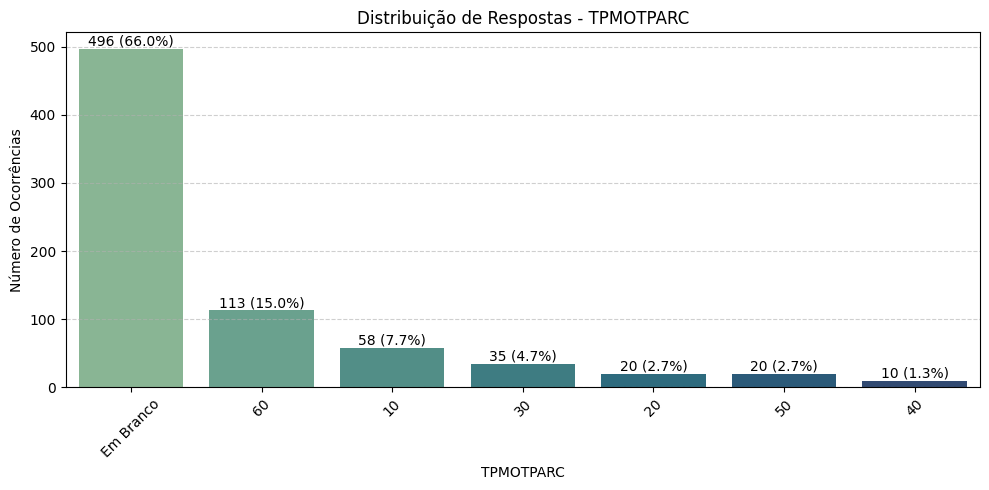


📊 Frequência da coluna: TPESQPAR
    TPESQPAR  Frequência  Percentual (%)
0         50         417           55.45
1         30         103           13.70
2         10          89           11.84
3         90          76           10.11
4         20          33            4.39
5         40          17            2.26
6  Em Branco          17            2.26


C:\Users\joaog\AppData\Local\Temp\ipykernel_9668\300361933.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coluna, y='Frequência', data=freq_table, palette='crest')


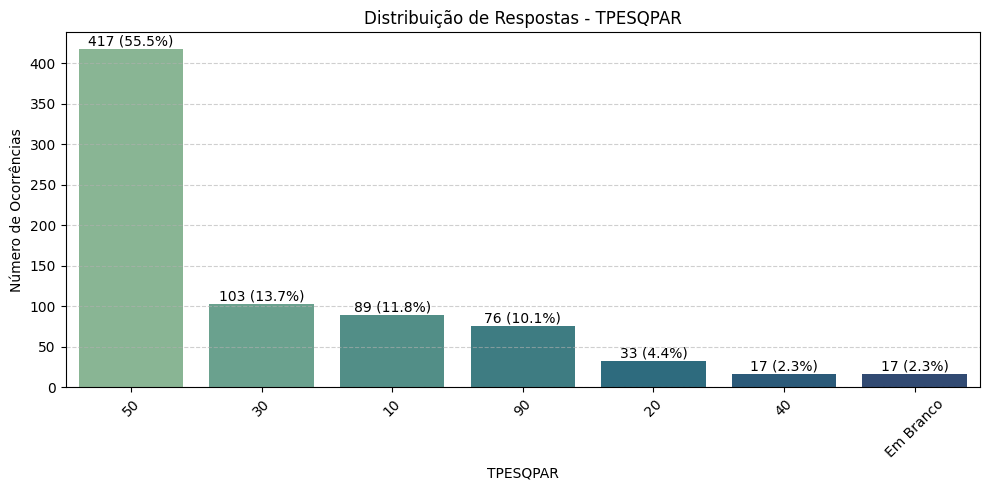


📊 Frequência da coluna: TratamentoParceiro
  TratamentoParceiro  Frequência  Percentual (%)
0                 20         460           61.17
1                 10         217           28.86
2                 90          68            9.04
3          Em Branco           7            0.93


C:\Users\joaog\AppData\Local\Temp\ipykernel_9668\300361933.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=coluna, y='Frequência', data=freq_table, palette='crest')


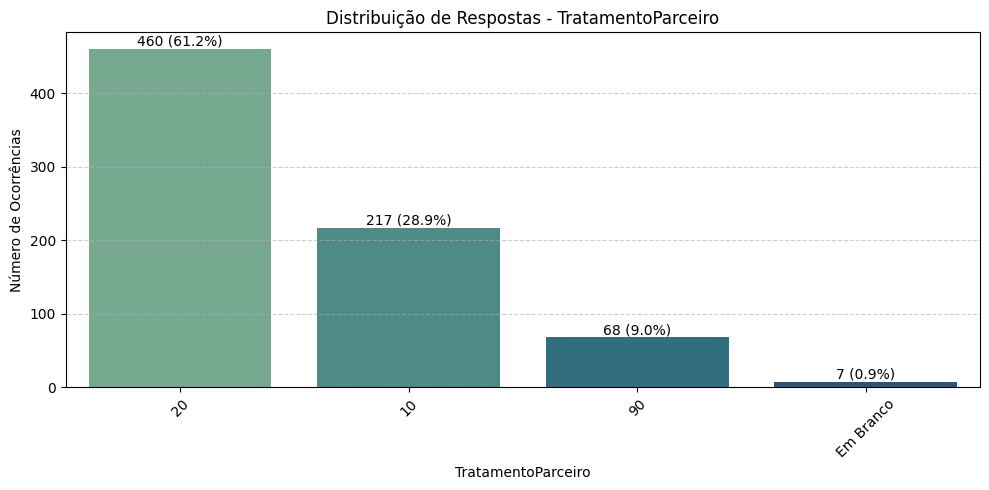


📊 Frequência da coluna: ID_UNIDADE


KeyError: 'ID_UNIDADE'

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df seja seu DataFrame
colunas = ['TPMOTPARC', 'TPESQPAR', 'TratamentoParceiro', 'ID_UNIDADE']

for coluna in colunas:
    print(f"\n📊 Frequência da coluna: {coluna}")
    freq_table = df[coluna].value_counts(dropna=False).reset_index()
    freq_table.columns = [coluna, 'Frequência']
    total = freq_table['Frequência'].sum()
    freq_table['Percentual (%)'] = (freq_table['Frequência'] / total * 100).round(2)
    print(freq_table)

    # Gráfico de barras com frequência e percentual
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=coluna, y='Frequência', data=freq_table, palette='crest')

    # Adicionando rótulos com valores e percentuais
    for i, row in freq_table.iterrows():
        label = f"{int(row['Frequência'])} ({row['Percentual (%)']:.1f}%)"
        plt.text(i, row['Frequência'] + 0.5, label, ha='center', va='bottom', fontsize=10)

    plt.title(f'Distribuição de Respostas - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Número de Ocorrências')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [ ]:
df.head(2)

print(df['TriGestacional'].unique().tolist())

['3º', '1º', '2º', 'Idade Gestacional Ignorada']


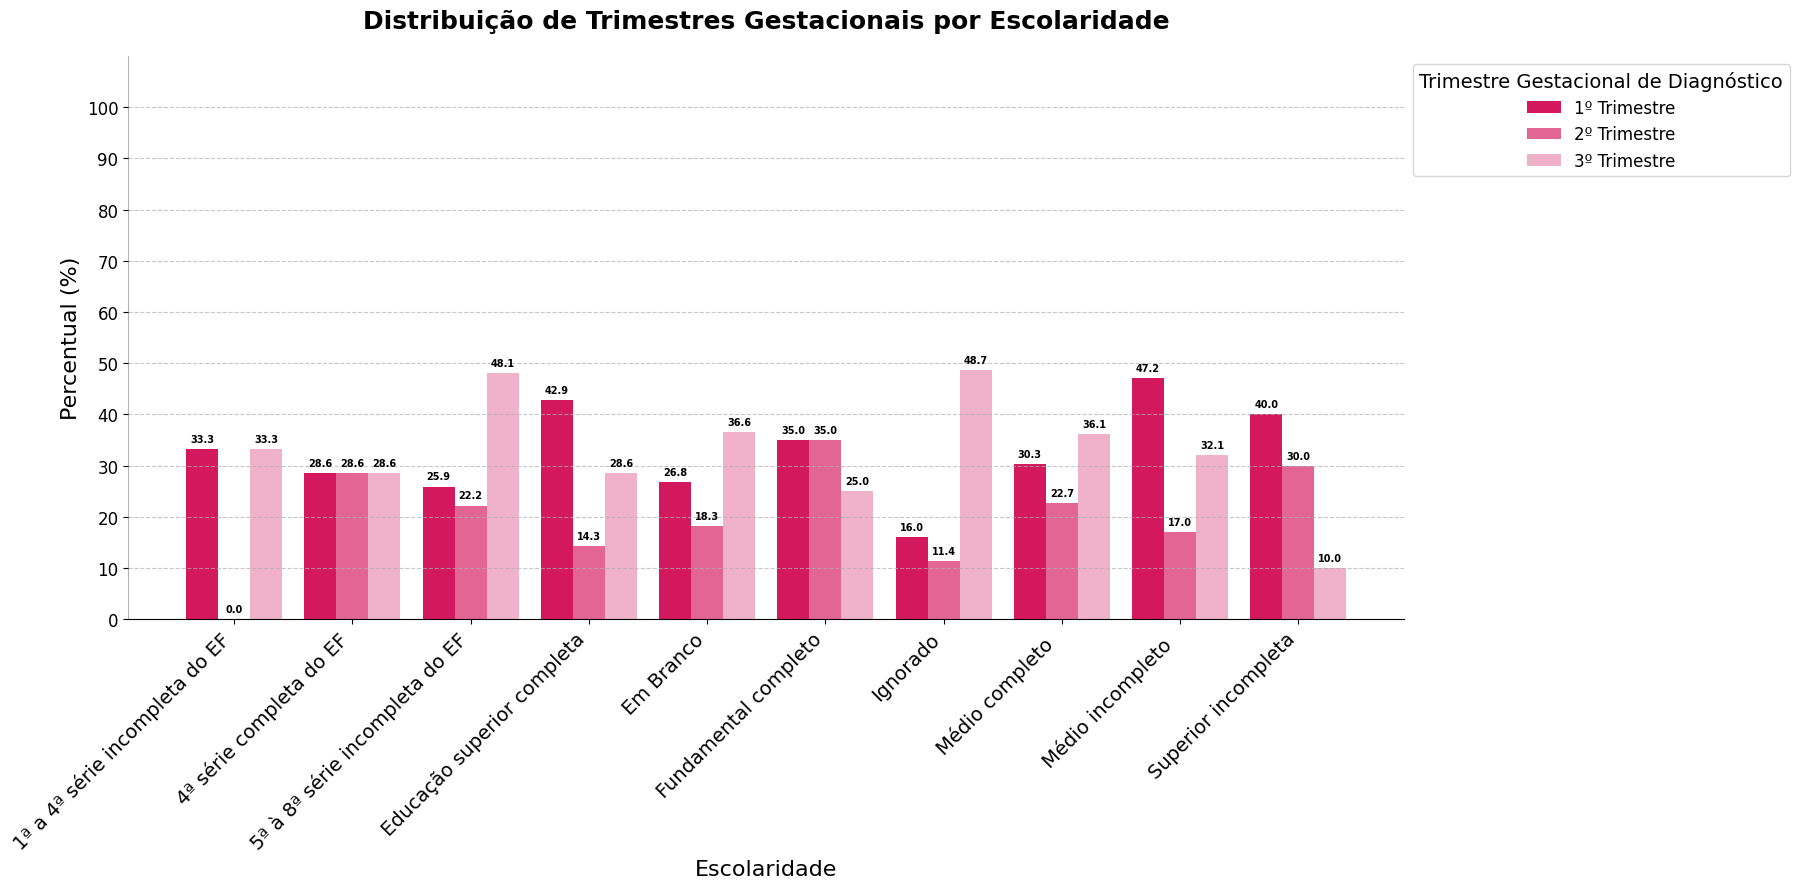

In [ ]:
from matplotlib.colors import to_rgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_soft_pink_gradient(base_color, n_shades):
    base_rgb = np.array(to_rgb(base_color))
    white = np.array([1, 1, 1])
    blend = [tuple(base_rgb + (white - base_rgb) * (i / n_shades)) for i in range(n_shades)]
    return blend

# Tabela de percentuais
tabela = pd.crosstab(df['Escolaridade'], df['TriGestacional'], normalize='index') * 100
ordem_trimestres = ['1º', '2º', '3º', 'Ignorado']
tabela = tabela[[col for col in ordem_trimestres if col in tabela.columns]]

# Dados de plotagem
trimestres = tabela.columns.tolist()
categorias = tabela.index.tolist()
n_trimestres = len(trimestres)

group_spacing = 2.4# Aumentado ainda mais o espaçamento entre grupos de barras
x = np.arange(len(categorias)) * group_spacing
width = 0.65  # Aumentada ainda mais a grossura das barras

# Paleta suave
base_pink = "#D3185D"
cores = generate_soft_pink_gradient(base_pink, n_trimestres)

fig, ax = plt.subplots(figsize=(18, 9))

for i, trimestre in enumerate(trimestres):
    valores = tabela[trimestre].values
    posicoes = x + i * width
    ax.bar(posicoes, valores, width=width, color=cores[i], label=f'{trimestre} Trimestre')

    for j, val in enumerate(valores):
        ax.text(posicoes[j], val + 1, f'{val:.1f}', ha='center', va='bottom', fontsize=7, fontweight='bold')

ax.set_xticks(x + width * (n_trimestres - 1) / 2)
ax.set_xticklabels(categorias, rotation=45, ha='right', fontsize=14)
ax.set_xlabel('Escolaridade', fontsize=16)
ax.set_ylabel('Percentual (%)', fontsize=16)
ax.set_ylim(0, 110)
ax.set_yticks(np.arange(0, 101, 10))
ax.tick_params(axis='y', labelsize=12)


ax.set_title('Distribuição de Diagnósticos em Trimestres Gestacionais por Escolaridade', fontsize=18, pad=20, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Trimestre Gestacional de Diagnóstico', title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)

plt.tight_layout()
plt.show()
# plt.savefig('bar_chart.png')

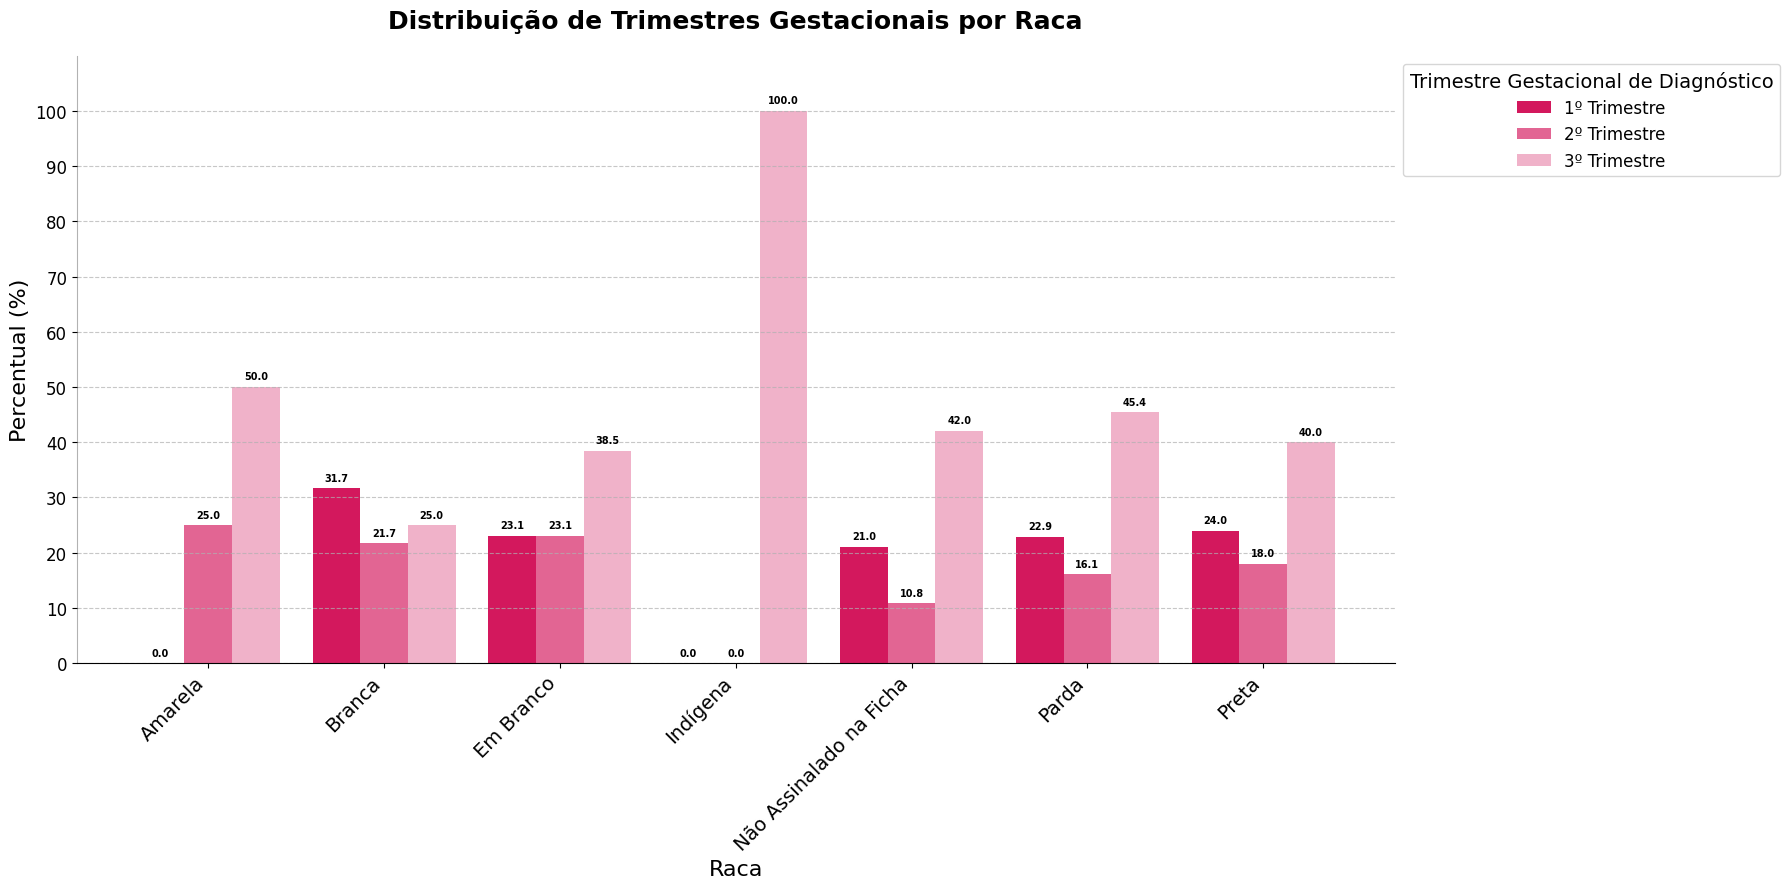

In [ ]:
from matplotlib.colors import to_rgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_soft_pink_gradient(base_color, n_shades):
    base_rgb = np.array(to_rgb(base_color))
    white = np.array([1, 1, 1])
    blend = [tuple(base_rgb + (white - base_rgb) * (i / n_shades)) for i in range(n_shades)]
    return blend

# Tabela de percentuais
tabela = pd.crosstab(df['Raca'], df['TriGestacional'], normalize='index') * 100
ordem_trimestres = ['1º', '2º', '3º', 'Ignorado']
tabela = tabela[[col for col in ordem_trimestres if col in tabela.columns]]

# Dados de plotagem
trimestres = tabela.columns.tolist()
categorias = tabela.index.tolist()
n_trimestres = len(trimestres)

group_spacing = 2.4  # Aumentado ainda mais o espaçamento entre grupos de barras
x = np.arange(len(categorias)) * group_spacing
width = 0.65  # Aumentada ainda mais a grossura das barras

# Paleta suave
base_pink = "#D3185D"
cores = generate_soft_pink_gradient(base_pink, n_trimestres)

fig, ax = plt.subplots(figsize=(18, 9))

for i, trimestre in enumerate(trimestres):
    valores = tabela[trimestre].values
    posicoes = x + i * width
    ax.bar(posicoes, valores, width=width, color=cores[i], label=f'{trimestre} Trimestre')

    for j, val in enumerate(valores):
        ax.text(posicoes[j], val + 1, f'{val:.1f}', ha='center', va='bottom', fontsize=7, fontweight='bold')

ax.set_xticks(x + width * (n_trimestres - 1) / 2)
ax.set_xticklabels(categorias, rotation=45, ha='right', fontsize=14)
ax.set_xlabel('Raca', fontsize=16)
ax.set_ylabel('Percentual (%)', fontsize=16)
ax.set_ylim(0, 110)
ax.set_yticks(np.arange(0, 101, 10))
ax.tick_params(axis='y', labelsize=12)

ax.set_title('Distribuição de Diagnósticos em Trimestres Gestacionais por Raça', fontsize=18, pad=20, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Trimestre Gestacional de Diagnóstico', title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)

plt.tight_layout()
plt.show()
# plt.savefig('bar_chart.png')


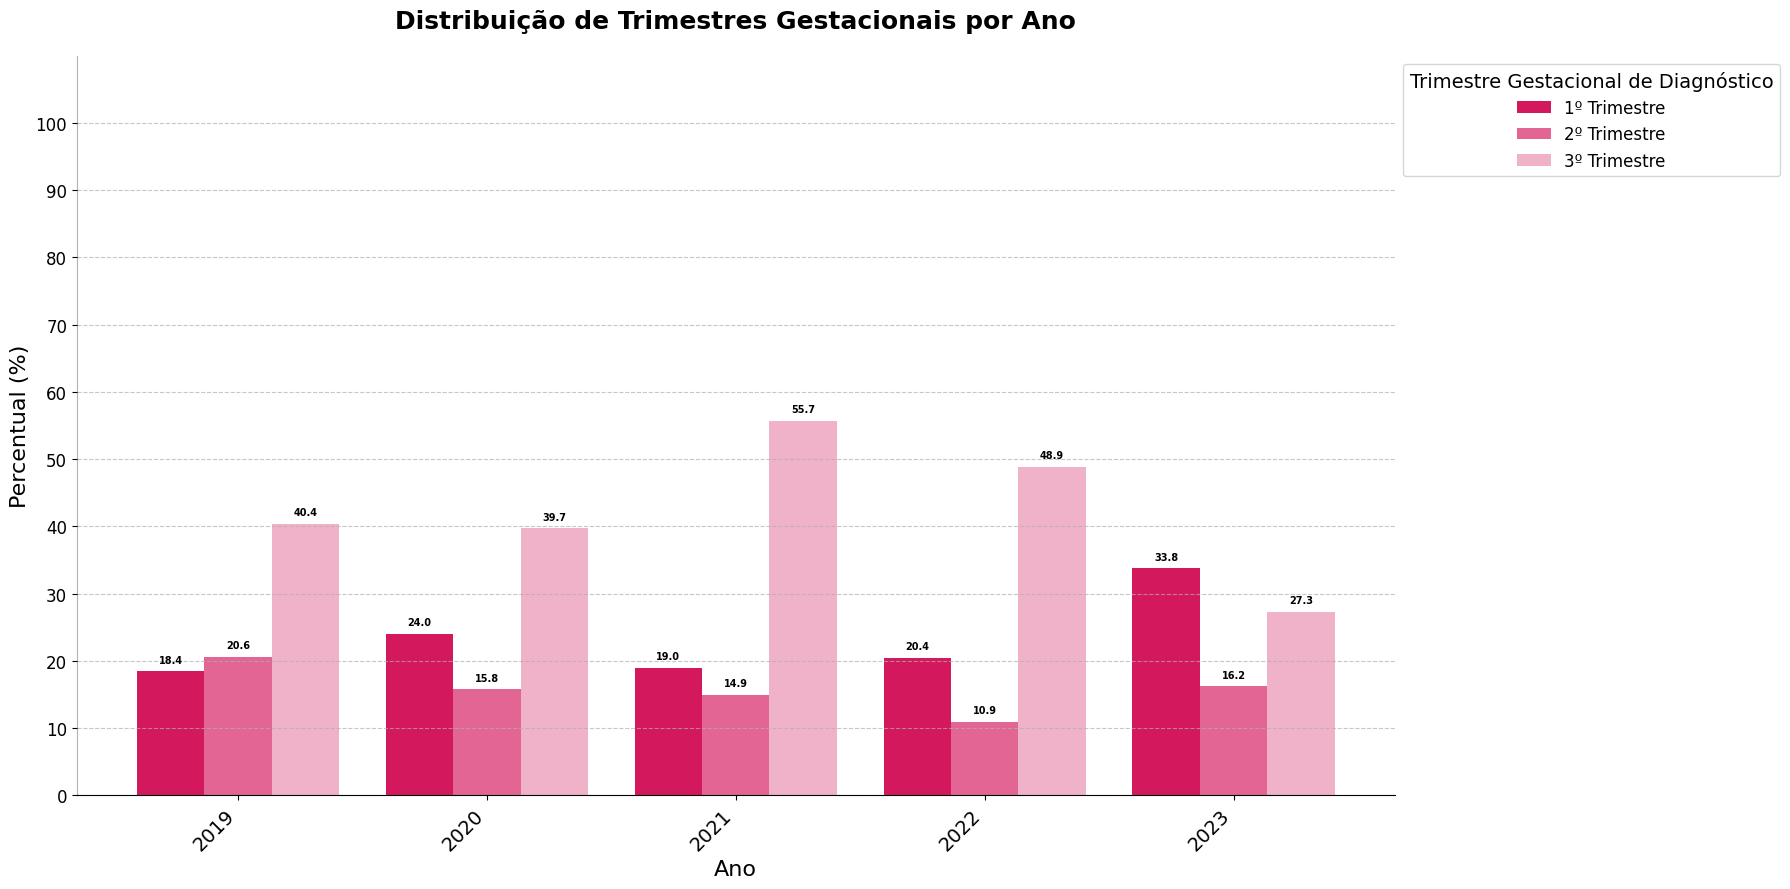

In [ ]:
from matplotlib.colors import to_rgb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def generate_soft_pink_gradient(base_color, n_shades):
    base_rgb = np.array(to_rgb(base_color))
    white = np.array([1, 1, 1])
    blend = [tuple(base_rgb + (white - base_rgb) * (i / n_shades)) for i in range(n_shades)]
    return blend

# Tabela de percentuais
tabela = pd.crosstab(df['Ano'], df['TriGestacional'], normalize='index') * 100
ordem_trimestres = ['1º', '2º', '3º', 'Ignorado']
tabela = tabela[[col for col in ordem_trimestres if col in tabela.columns]]

# Dados de plotagem
trimestres = tabela.columns.tolist()
categorias = tabela.index.tolist()
n_trimestres = len(trimestres)

group_spacing = 2.4  # Aumentado ainda mais o espaçamento entre grupos de barras
x = np.arange(len(categorias)) * group_spacing
width = 0.65  # Aumentada ainda mais a grossura das barras

# Paleta suave
base_pink = "#D3185D"
cores = generate_soft_pink_gradient(base_pink, n_trimestres)

fig, ax = plt.subplots(figsize=(18, 9))

for i, trimestre in enumerate(trimestres):
    valores = tabela[trimestre].values
    posicoes = x + i * width
    ax.bar(posicoes, valores, width=width, color=cores[i], label=f'{trimestre} Trimestre')

    for j, val in enumerate(valores):
        ax.text(posicoes[j], val + 1, f'{val:.1f}', ha='center', va='bottom', fontsize=7, fontweight='bold')

ax.set_xticks(x + width * (n_trimestres - 1) / 2)
ax.set_xticklabels(categorias, rotation=45, ha='right', fontsize=14)
ax.set_xlabel('Ano', fontsize=16)
ax.set_ylabel('Percentual (%)', fontsize=16)
ax.set_ylim(0, 110)
ax.set_yticks(np.arange(0, 101, 10))
ax.tick_params(axis='y', labelsize=12)

ax.set_title('Distribuição de Diagnósticos em Trimestres Gestacionais por Ano', fontsize=18, pad=20, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Trimestre Gestacional de Diagnóstico', title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.3)

plt.tight_layout()
plt.show()
# plt.savefig('bar_chart.png')
